In [1]:
from DataAnalysis import *

# Global reading

In [3]:
filtered_days=[]#'2018-06-07', '2018-06-06']
aggregator =""
label_table = "nb_clicks"

filename = get_filename(label_table, aggregator)
df_clicks = read_and_clean(filename, label_table,aggregator, filtered_days, False)
df_grouped= group_by_label_sum(df_clicks, ["nb_clicks"])
print(df_grouped)

    nb_clicks  Hour       Count
0           0  8549  3721971914
1           1  8549     5435738
2           2  8549      180733
3           3  8549       17379
4           4  8493        5212
5           5  7745        1782
6           6  6372        1012
7           7  4038         431
8           8  3170         315
9           9  2186         219
10         10  1588         153
11         11   833          76
12         12   691          59
13         13   396          27
14         14   486          35
15         15   247          19
16         16   193          14
17         17   133          12
18         18   112           9
19         19    80           7
20         20    67           5
21         21    16           1
22         24     9           1
23         25    32           2
24         26    17           1
25         27    17           1
26         28     7           1
27         81    18           1
28         83    15           1
29        145     9           1
30      

## Analysis of the outliers 

In [ ]:
threshold = 20
day = '2018-06-01'

In [11]:
df_clicks["nb_clicks"].unique()

array([  3,   2,   1,   0,   6,   5,   4,   8,  10,   7,  11,   9,  12,
        13,  17,  19,  28,  15,  24,  14,  16,  18,  21,  20, 145,  83,
        26, 840,  25,  27,  81])

In [42]:
df_grouped= group_by_label_sum(df_clicks, ["nb_clicks", "cbs_media_source_id"], "nb_clicks")

In [43]:
print(df_grouped)

      nb_clicks  cbs_media_source_id  Hour      Count         Ratio
0             0                   65  8549  315710567      0.000000
1             0                   92  8549   81462620      0.000000
2             0                   96  7552      73415      0.000000
3             0                  100  8549  110662626      0.000000
4             0                  101  8549   54287236      0.000000
5             0                  129    18          2      0.000000
6             0                  131  8549  867445018      0.000000
7             0                  132  8549   30268914      0.000000
8             0                  158    13          2      0.000000
9             0                  162  8549  114830990      0.000000
10            0                  163   140         45      0.000000
11            0                  164  8549  479777949      0.000000
12            0                  165  8549  106508371      0.000000
13            0                  172  8549   100

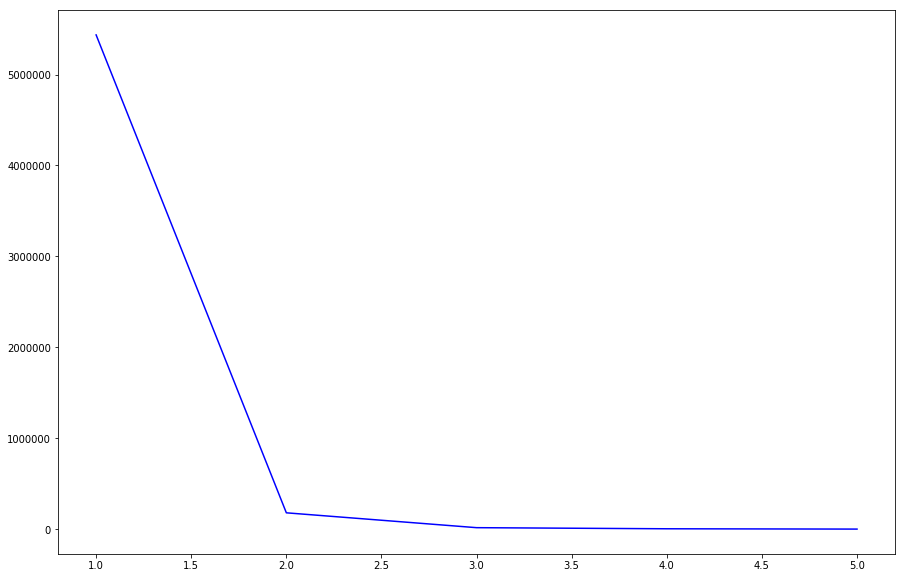

In [22]:
plt.figure(figsize=(15, 10))
#plt.title(title, size=20)
plt.plot(df_grouped["nb_clicks"][1:6], df_grouped["Count"][1:6], 'b')

In [ ]:
filtered_days=[]#'2018-06-07', '2018-06-06']
aggregator ="cbs_media_source_id"
label_table = "nb_clicks"

filename = get_filename(label_table, aggregator)
df_clicks = read_and_clean3(filename, label_table,aggregator, filtered_days, False)